In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

california_housing = fetch_california_housing(as_frame=True)
print(california_housing)



{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -1

In [2]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [3]:
X,y= fetch_california_housing(return_X_y=True)

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])
mod=GridSearchCV(estimator=pipe, param_grid={'model__n_neighbors':[1,2,3,4,5,6,7,8,9,10]},cv=3, n_jobs=-1)
a=mod.fit(X,y);
pred=a.predict(X)
print(pred)



[4.784107 4.326802 4.355605 ... 0.8098   0.8726   1.0126  ]


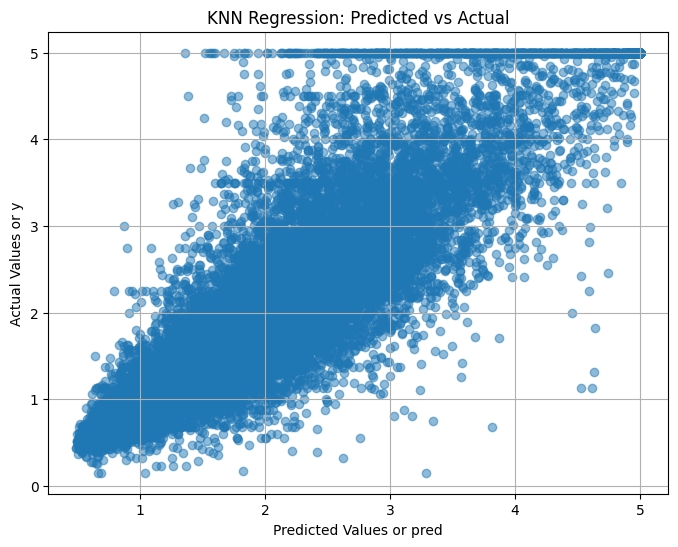

In [4]:

# نمودار پیش‌بینی در برابر مقدار واقعی
plt.figure(figsize=(8, 6))
plt.scatter(pred, y, alpha=0.5)
plt.xlabel("Predicted Values or pred")
plt.ylabel("Actual Values or y")
plt.title("KNN Regression: Predicted vs Actual")
plt.grid()
plt.show()

In [5]:
c=pd.DataFrame(mod.cv_results_)
print(c)


   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.070369      0.005768         0.767697        0.070369   
1       0.066917      0.000963         0.866677        0.074992   
2       0.064341      0.003198         0.944639        0.072913   
3       0.062938      0.000630         0.976708        0.087363   
4       0.060663      0.002804         1.038174        0.071552   
5       0.061846      0.003154         1.097173        0.114561   
6       0.062652      0.003665         1.164318        0.115950   
7       0.062446      0.001274         1.188412        0.041794   
8       0.062971      0.000260         1.006007        0.049419   
9       0.066371      0.005094         0.901258        0.057486   

   param_model__n_neighbors                      params  split0_test_score  \
0                         1   {'model__n_neighbors': 1}           0.324068   
1                         2   {'model__n_neighbors': 2}           0.468788   
2                         3 

ConversionError: Failed to convert value(s) to axis units: array([{'model__n_neighbors': 1}, {'model__n_neighbors': 2},
       {'model__n_neighbors': 3}, {'model__n_neighbors': 4},
       {'model__n_neighbors': 5}, {'model__n_neighbors': 6},
       {'model__n_neighbors': 7}, {'model__n_neighbors': 8},
       {'model__n_neighbors': 9}, {'model__n_neighbors': 10}],
      dtype=object)

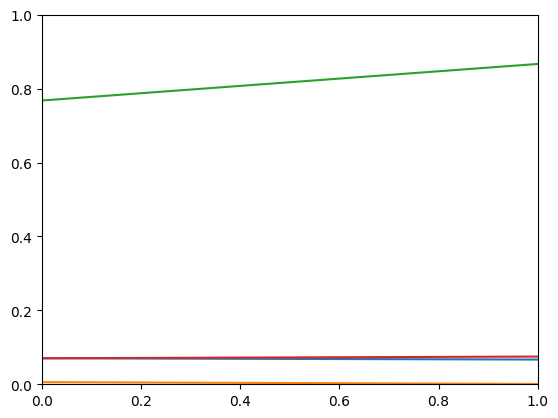

In [6]:

plt.plot(pd.DataFrame(mod.cv_results_))

plt.plot(pred,y)
plt.show()

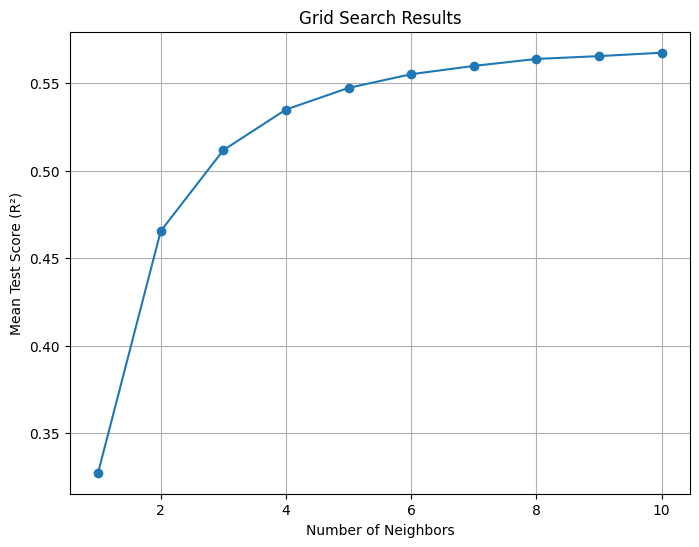

In [7]:
# نمایش نتایج GridSearchCV
cv_results = pd.DataFrame(mod.cv_results_)
plt.figure(figsize=(8, 6))
plt.plot(cv_results["param_model__n_neighbors"], cv_results["mean_test_score"], marker='o', linestyle='-')
plt.xlabel("Number of Neighbors")
plt.ylabel("Mean Test Score (R²)")
plt.title("Grid Search Results")
plt.grid()
plt.show()

In [8]:
# نمایش بهترین پارامتر و امتیاز
print(f"Best Parameters: {mod.best_params_}")
print(f"Best Score: {mod.best_score_:.4f}")

Best Parameters: {'model__n_neighbors': 10}
Best Score: 0.5675
